# WeatherPy
----

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy



# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [52]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [53]:
# Starting URL for Weather Map API call
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"
# Print (url)


# List of City Data
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print ("-" * 15)


# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in list
for index, city in enumerate(cities):
    # Group cities in sets of 50 for loggin purpose
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    
    # Log the URL and set number
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        
        # Extract out max temp humidity and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the city info into the city data list
        city_data.append({
            "City" :city,
            "Lat" :city_lat,
            "Lng" :city_lng,
            "Max Temp" :city_max_temp,
            "Humidity" :city_humidity,
            "Cloudiness" :city_clouds,
            "Windspeed" :city_wind,
            "Country" :city_country,
            "Date" :city_date  
        })
    except:
        print("City not found. Skipping ...")
        pass
    # Indicate that data loading is complete
        print("-----------------------")
        print("Data Retrieval Complete")
        print("-----------------------")
        
        
        
        

Beginning Data Retrieval
---------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | chonchi
Processing Record 8 of Set 1 | alice springs
Processing Record 9 of Set 1 | kavieng
Processing Record 10 of Set 1 | shahpur chakar
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | jaguaribe
Processing Record 13 of Set 1 | colesberg
Processing Record 14 of Set 1 | kargopol'
Processing Record 15 of Set 1 | taiohae
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 16 of Set 1 | alotau
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
# Convert array of JSON into Pandas
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()



City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Windspeed     591
Country       591
Date          591
dtype: int64

In [26]:
# Display the city Data Frame
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,talnakh,69.4865,88.3972,69.21,66,9,5.01,RU,1690405425
1,navoiy,40.0844,65.3792,81.88,18,0,4.61,UZ,1690405653
2,chonchi,-42.6128,-73.8092,48.11,93,100,0.92,CL,1690405654
3,yellowknife,62.4560,-114.3525,75.60,30,1,11.48,CA,1690405654
4,port-aux-francais,-49.3500,70.2167,41.31,77,84,42.48,TF,1690405655


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv(r"C:\Users\wstod\OneDrive\Desktop\Python-Api-Challenge\cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv(r"C:\Users\wstod\OneDrive\Desktop\Python-Api-Challenge\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,69.21,66,9,5.01,RU,1690405425
1,navoiy,40.0844,65.3792,81.88,18,0,4.61,UZ,1690405653
2,chonchi,-42.6128,-73.8092,48.11,93,100,0.92,CL,1690405654
3,yellowknife,62.4560,-114.3525,75.60,30,1,11.48,CA,1690405654
4,port-aux-francais,-49.3500,70.2167,41.31,77,84,42.48,TF,1690405655


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Windspeed']

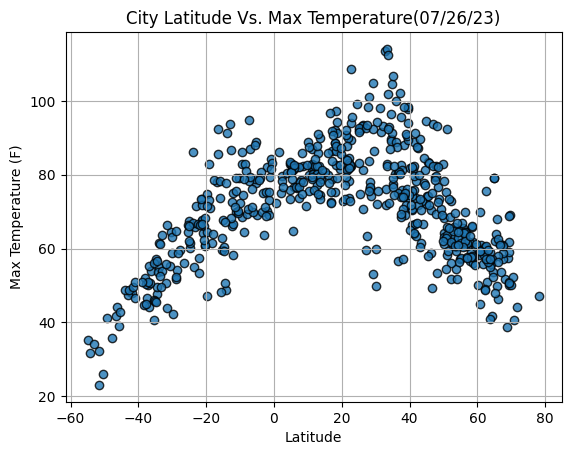

In [36]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig(r"C:\Users\wstod\OneDrive\Desktop\Python-Api-Challenge\WeatherPy\Fig1.PNG")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

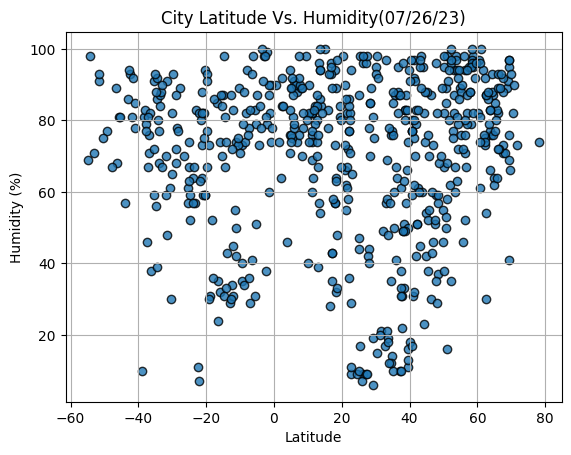

In [37]:
# Build scatter plot for latitude vs. Humidity
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig(r"C:\Users\wstod\OneDrive\Desktop\Python-Api-Challenge\WeatherPy\Fig2.PNG")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

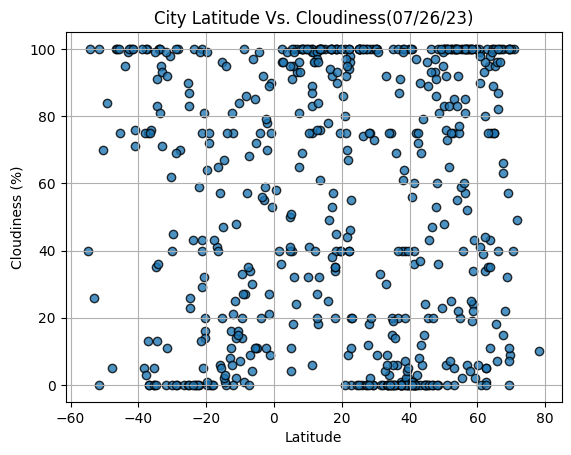

In [38]:
# Build scatter plot for latitude vs. Cloudiness
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig(r"C:\Users\wstod\OneDrive\Desktop\Python-Api-Challenge\WeatherPy\Fig3.PNG")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

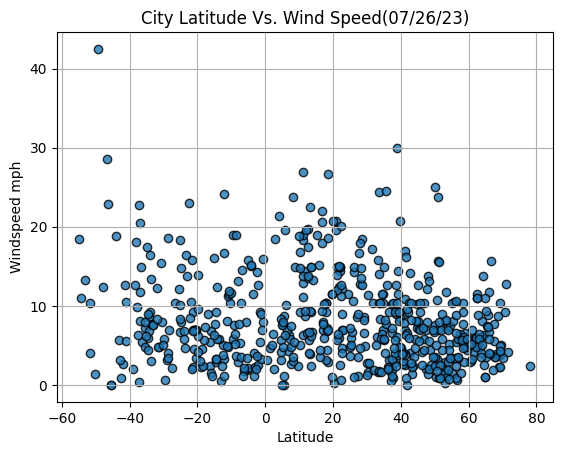

In [39]:
# Build scatter plot for latitude vs. Windspeed
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig(r"C:\Users\wstod\OneDrive\Desktop\Python-Api-Challenge\WeatherPy\Fig4.PNG")

# Show plot
plt.show()

## Linear Regression

In [40]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,69.21,66,9,5.01,RU,1690405425
1,navoiy,40.0844,65.3792,81.88,18,0,4.61,UZ,1690405653
3,yellowknife,62.4560,-114.3525,75.60,30,1,11.48,CA,1690405654
5,utrik,11.2278,169.8474,82.29,82,100,18.30,MH,1690405655
6,longyearbyen,78.2186,15.6401,47.23,74,10,2.37,SJ,1690405656


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
2,chonchi,-42.6128,-73.8092,48.11,93,100,0.92,CL,1690405654
4,port-aux-francais,-49.3500,70.2167,41.31,77,84,42.48,TF,1690405655
8,fale old settlement,-9.3852,-171.2468,83.03,73,14,18.97,TK,1690405656
10,avarua,-21.2078,-159.7750,73.45,73,100,2.30,CK,1690405657
12,puerto natales,-51.7236,-72.4875,32.11,91,100,4.09,CL,1690405411


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6379594377431146


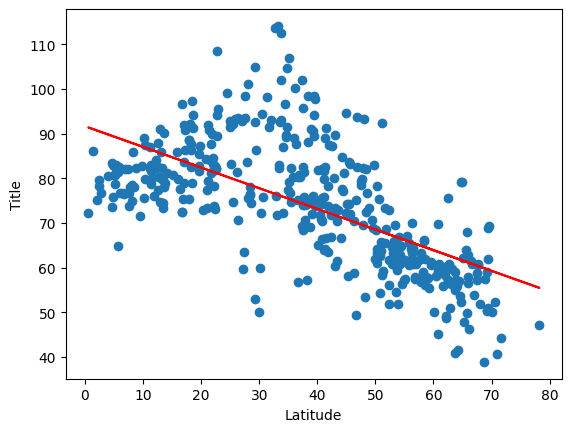

In [43]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8331444052136324


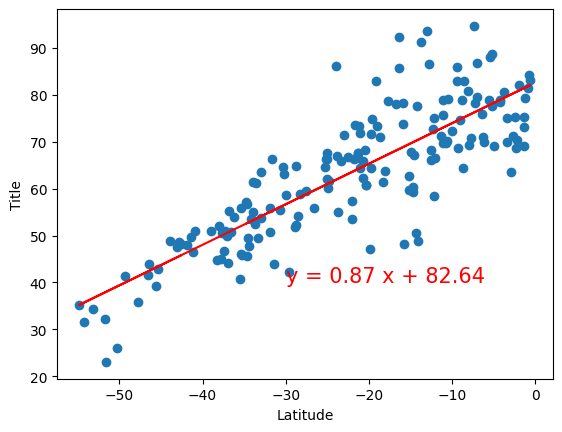

In [44]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.090782945397427


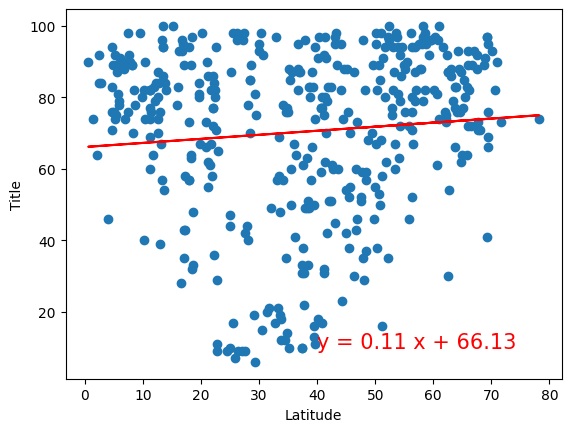

In [45]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.10859323566477033


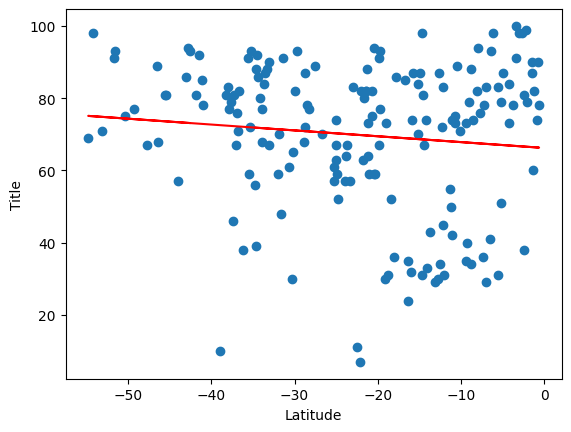

In [46]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.07609045293475124


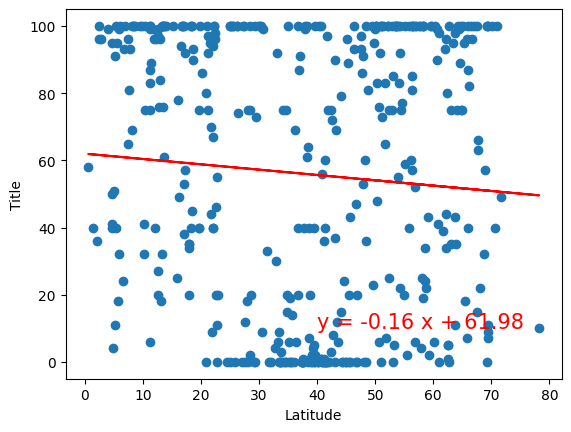

In [47]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.22296141112872647


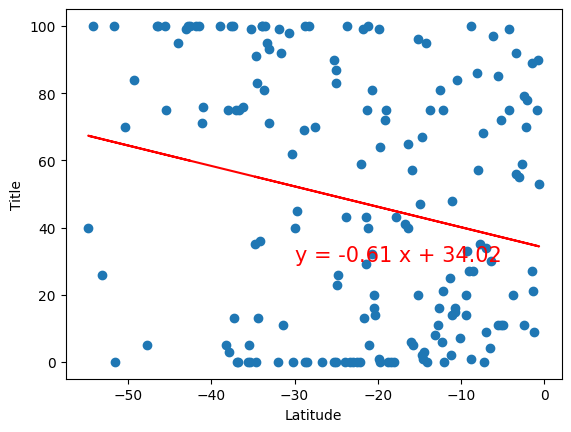

In [48]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.28233988516805414


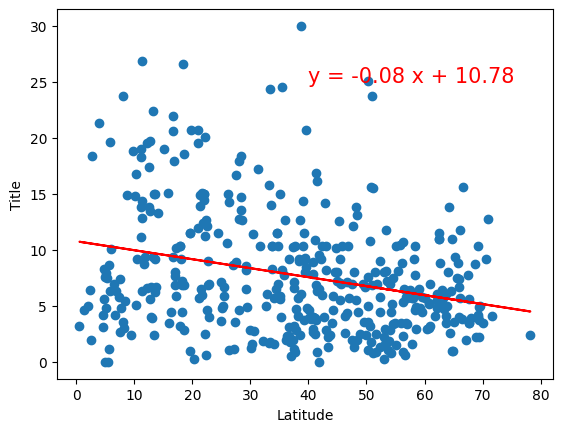

In [49]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Windspeed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (40,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.201720442209206


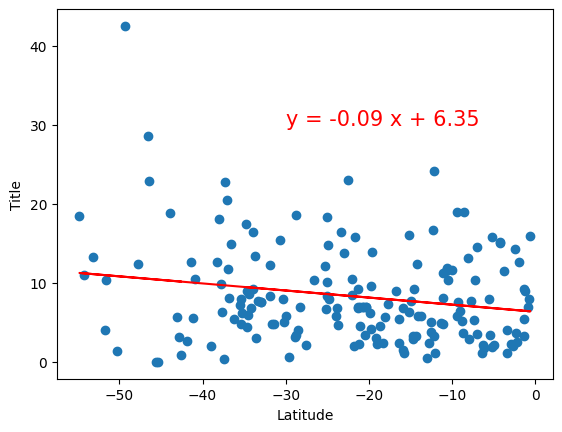

In [50]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Windspeed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (-30,30))